In [14]:
import pandas as pd

filepath = "../../data/pfex_2004-2024.csv"
df = pd.read_csv(filepath)

print(df.head())

  FishCode                 FishDesc  Consigned  Sold  LowPrice  AvgPrice  \
0     FWWL         Greysole | large        NaN    34      2.36      3.38   
1     MKTL  Monkfish, tails | large        NaN  8594      2.00      2.65   
2     CADM             Cod | market        NaN  5259      2.06      3.13   
3     FPWM             Dab | medium        NaN  3692      0.80      1.41   
4     HDDP        Haddock | snapper        NaN   474      0.98      1.68   

   HighPrice  MonthNum  YearNum  
0       5.12         1     2023  
1       3.92         1     2023  
2       4.77         1     2023  
3       1.87         1     2023  
4       2.00         1     2023  


In [15]:
print("Unique fish codes:", len(df['FishCode'].unique()))
print(df['FishCode'].unique())

Unique fish codes: 140
['FWWL' 'MKTL' 'CADM' 'FPWM' 'HDDP' 'MKTS' 'CADS' 'FADS' 'HDDL' 'SSBR'
 'FNWS' 'FPWS' 'FPWL' 'HWSJ' 'HWSM' 'PADS' 'HSWX' 'CKDX' 'FWWM' 'PADL'
 'PADM' 'CADL' 'FWWS' 'HDDS' 'HWSL' 'POWX' 'HWSS' 'FADM' 'FNWL' 'FYWS'
 'FYWL' 'FADL' 'KUGX' 'FADJ' 'FNWJ' 'MKLX' 'FWWP' 'FYWX' 'FNWX' 'PASX'
 'FPWU' 'FWWU' 'HDDU' 'HWSU' 'PADN' 'PADO' 'POWU' 'HRWX' 'MKDL' 'SWSJ'
 'CADU' 'PBWX' 'MKDS' 'BFDX' 'FNGL' 'FNGJ' 'FNGS' 'MAWX' 'HDDC' 'HWSC'
 'SPSJ' 'SMSL' 'SWSM' 'SMSM' 'FTWX' 'SWSL' 'HSWL' 'TFDL' 'QIWX' 'SPSL'
 'BTWX' 'SPSM' 'SPSS' 'SMSS' 'SGWX' 'SWSS' 'SWSP' 'TBBE' 'FPWP' 'DODX'
 'TBYF' 'LAWX' 'SMSJ' 'SFLN' 'SFCS' 'SFLT' 'SFLC' 'SFLR' 'FPWX' 'HSWS'
 'SSML' 'SSMJ' 'SSMM' 'CASX' 'FNWP' 'SDWX' 'FWWX' 'HWSX' 'SUBX' 'TBBF'
 'QLWX' 'SCMX' 'CODX' 'TFDM' 'PASM' 'FSWM' 'FOWX' 'UNSP' 'FNGP' 'FSWJ'
 'MUSS' 'FSWS' 'EXP' 'BTF' 'FSWL' 'TLK' 'TML' 'WMS' 'DOG' 'CLA' '2ND'
 'SXL' 'SKL' 'MKJ' 'CUN' 'GRP' 'HDR' 'HNG' 'SEW' 'SKS' 'LBX' 'FSF' 'SHP'
 'LBR' 'YGS' 'YGL' 'LMP' 'GSE' 'FSWX' 'EEL']


In [16]:
print("Unique fish descriptions:", len(df['FishDesc'].unique()))

# Group by 'FishCode' and the lowercase 'FishDesc', then aggregate to keep the first description
aggregated = df.groupby('FishCode')['FishDesc'].agg(lambda x: x.iloc[0]).reset_index()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Displaying the result
print(aggregated)

Unique fish descriptions: 214
    FishCode                        FishDesc
0        2ND                         SECONDS
1       BFDX                Bluefish | mixed
2        BTF                     BUTTER FISH
3       BTWX              Butterfish | mixed
4       CADL                     Cod | large
5       CADM                    Cod | market
6       CADS                     Cod | scrod
7       CADU                  Cod undersized
8       CASX                    Cod | scaler
9       CKDX                    Cusk | mixed
10       CLA               CLAMS | SOFTSHELL
11      CODX          Catfish, ocean | mixed
12       CUN                          CUNNER
13      DODX             Dophin Fish I mixed
14       DOG      DO NOT USE(DOGFISH | BULK)
15       EEL                             Eel
16       EXP            EXPERIMENTAL SPECIES
17      FADJ        Halibut, Atlantic | >125
18      FADL      Halibut, Atlantic | 85-125
19      FADM       Halibut, Atlantic | 50-85
20      FADS       Halibu

In [17]:
# List of keywords to search for in the 'FishDesc' column, case-insensitive
keywords = ['cod', 'haddock', 'pollock', 'flounder', 'hake', 'redfish', 'halibut', 'yellowtail']

# Creating a regex pattern to match any of the keywords
pattern = '|'.join(keywords)

# Filter the DataFrame to keep records containing any of the keywords in 'FishDesc'
groundfish_df = df[df['FishDesc'].str.contains(pattern, case=False, na=False)].copy()

# Group by 'FishCode' and 'FishDesc', then aggregate to keep the first description
aggregated = groundfish_df.groupby('FishCode')['FishDesc'].agg(lambda x: x.iloc[0]).reset_index()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

print(aggregated)


   FishCode                        FishDesc
0      CADL                     Cod | large
1      CADM                    Cod | market
2      CADS                     Cod | scrod
3      CADU                  Cod undersized
4      CASX                    Cod | scaler
5      CODX                        CODXFISH
6      FADJ        Halibut, Atlantic | >125
7      FADL      Halibut, Atlantic | 85-125
8      FADM       Halibut, Atlantic | 50-85
9      FADS       Halibut, Atlantic | 10-50
10     FOWX    Flounder, windowpane | mixed
11      FSF              FOUR SPOT FLOUNDER
12     FYWL              Yellowtail | large
13     FYWS              Yellowtail | small
14     FYWX              Yellowtail | mixed
15     HDDC                Haddock | scaler
16     HDDL                 Haddock | large
17     HDDP               Haddock | snapper
18     HDDS                 Haddock | scrod
19     HDDU            Haddock | undersized
20      HDR                     HADDOCK ROE
21     HRWX         Hake, red wh

In [18]:
# Define the mapping of starting sequences to FishGroup categories
fish_group_mapping = {
    'C': 'Cod',
    'FA': 'Halibut',
    'FY': 'Yellowtail',
    'HD': 'Haddock',
    'HW': 'Hake',
    'PA': 'Pollock',
    'PO': 'Redfish',
    'Y': 'Yellowtail'
}

# Function to determine the FishGroup based on the FishCode
def assign_fish_group(fish_code):
    for start_seq, group in fish_group_mapping.items():
        if fish_code.startswith(start_seq):
            return group
    return 'OTHER'  # Default assignment if no match found

# Apply the function to create the new 'FishGroup' column
groundfish_df.loc[:, 'FishGroup'] = groundfish_df['FishCode'].apply(assign_fish_group)

# Display the DataFrame to verify the result
print(groundfish_df.head(5))


  FishCode                   FishDesc  Consigned   Sold  LowPrice  AvgPrice  \
2     CADM               Cod | market        NaN   5259      2.06      3.13   
4     HDDP          Haddock | snapper        NaN    474      0.98      1.68   
6     CADS                Cod | scrod        NaN     72      1.21      1.78   
7     FADS  Halibut, Atlantic | 10-50        NaN     39     13.01     13.01   
8     HDDL            Haddock | large        NaN  12909      1.88      2.32   

   HighPrice  MonthNum  YearNum FishGroup  
2       4.77         1     2023       Cod  
4       2.00         1     2023   Haddock  
6       2.73         1     2023       Cod  
7      13.01         1     2023   Halibut  
8       2.89         1     2023   Haddock  


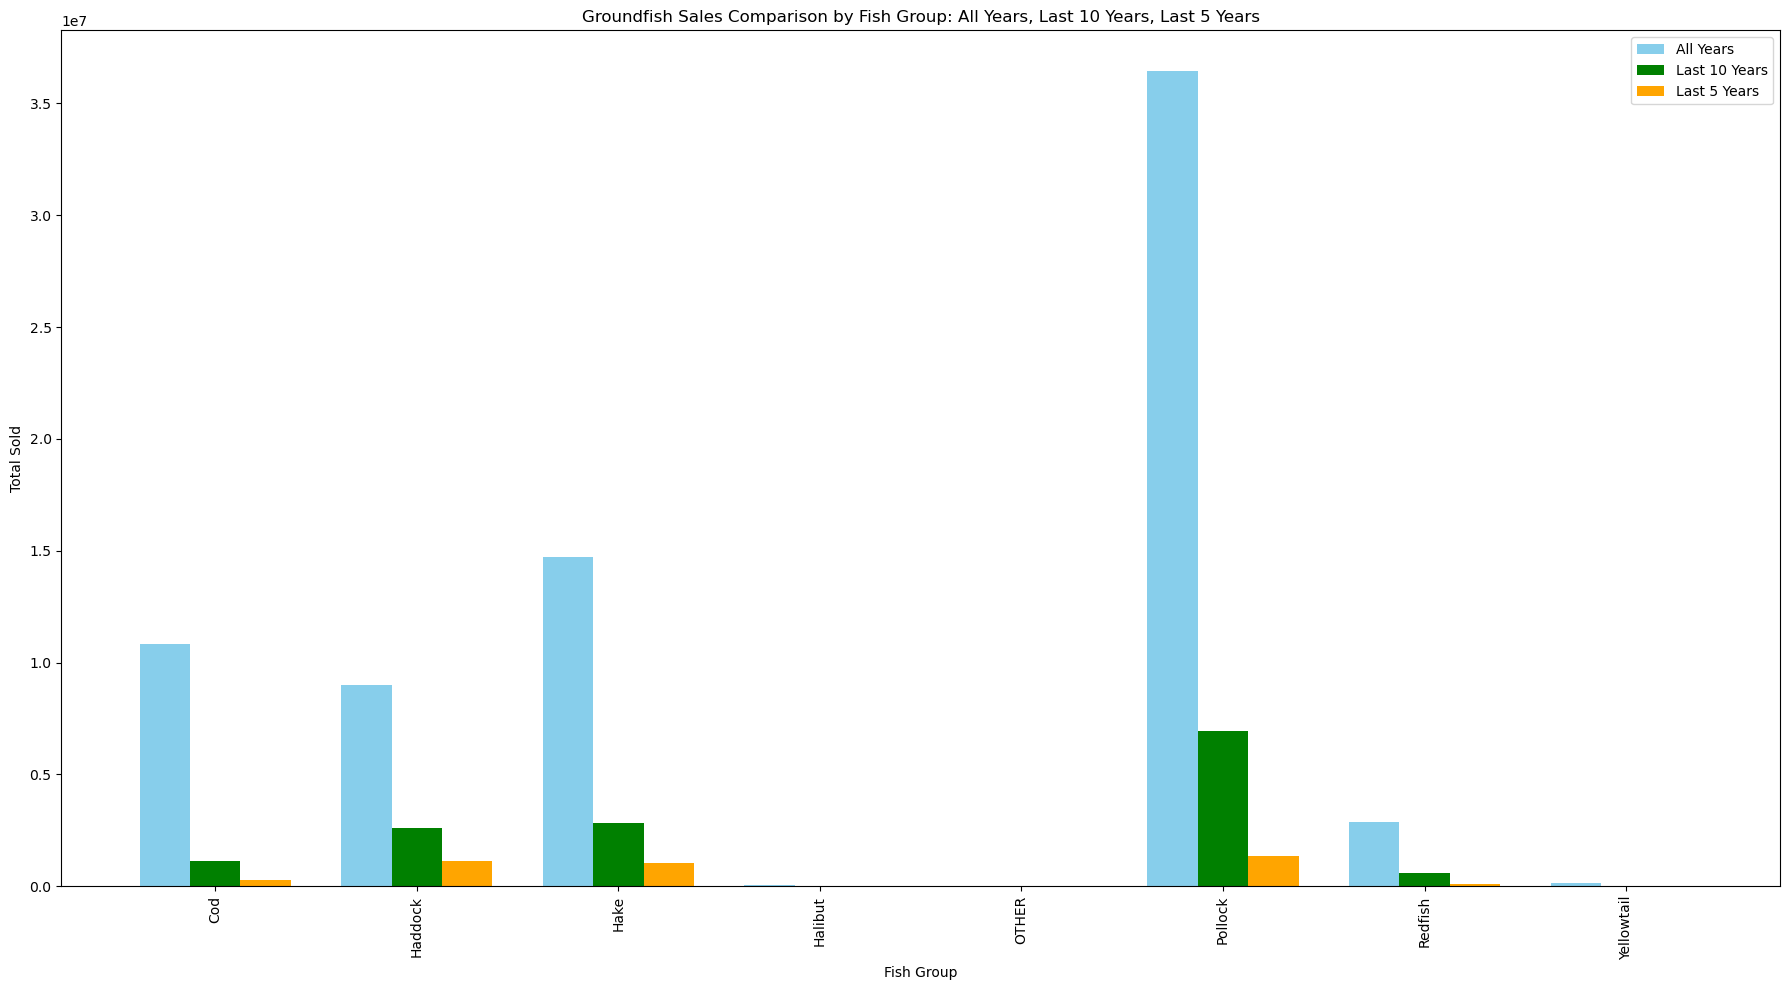

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# For all years, sum 'Sold' by 'FishGroup'
total_sold_per_fishgroup_all_years = groundfish_df.groupby('FishGroup')['Sold'].sum().reset_index()

# For the last 10 years
groundfish_df_recent_10_years = groundfish_df[groundfish_df['YearNum'] >= 2014]
total_sold_per_fishgroup_last_10_years = groundfish_df_recent_10_years.groupby('FishGroup')['Sold'].sum().reset_index()

# For the last 5 years
groundfish_df_recent_5_years = groundfish_df[groundfish_df['YearNum'] >= 2019]
total_sold_per_fishgroup_last_5_years = groundfish_df_recent_5_years.groupby('FishGroup')['Sold'].sum().reset_index()

# Create a comprehensive list of all FishGroups across all timeframes
all_fish_groups = pd.concat([total_sold_per_fishgroup_all_years['FishGroup'],
                             total_sold_per_fishgroup_last_10_years['FishGroup'],
                             total_sold_per_fishgroup_last_5_years['FishGroup']]).unique()

# Ensure each FishGroup has a row in each timeframe, filling missing values with 0
def ensure_all_groups_present(df, all_groups):
    template = pd.DataFrame(all_groups, columns=['FishGroup'])
    return template.merge(df, on='FishGroup', how='left').fillna(0)

# Apply the function to all datasets
aligned_all_years = ensure_all_groups_present(total_sold_per_fishgroup_all_years, all_fish_groups)
aligned_last_10_years = ensure_all_groups_present(total_sold_per_fishgroup_last_10_years, all_fish_groups)
aligned_last_5_years = ensure_all_groups_present(total_sold_per_fishgroup_last_5_years, all_fish_groups)

# Plotting with aligned data
plt.figure(figsize=(18, 10))
bar_width = 0.25
index = np.arange(len(all_fish_groups))  # Use the comprehensive list of groups for the index

plt.bar(index - bar_width, aligned_all_years['Sold'], bar_width, label='All Years', color='skyblue')
plt.bar(index, aligned_last_10_years['Sold'], bar_width, label='Last 10 Years', color='green')
plt.bar(index + bar_width, aligned_last_5_years['Sold'], bar_width, label='Last 5 Years', color='orange')

plt.xlabel('Fish Group')
plt.ylabel('Total Sold')
plt.title('Groundfish Sales Comparison by Fish Group: All Years, Last 10 Years, Last 5 Years')
plt.xticks(index, all_fish_groups, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


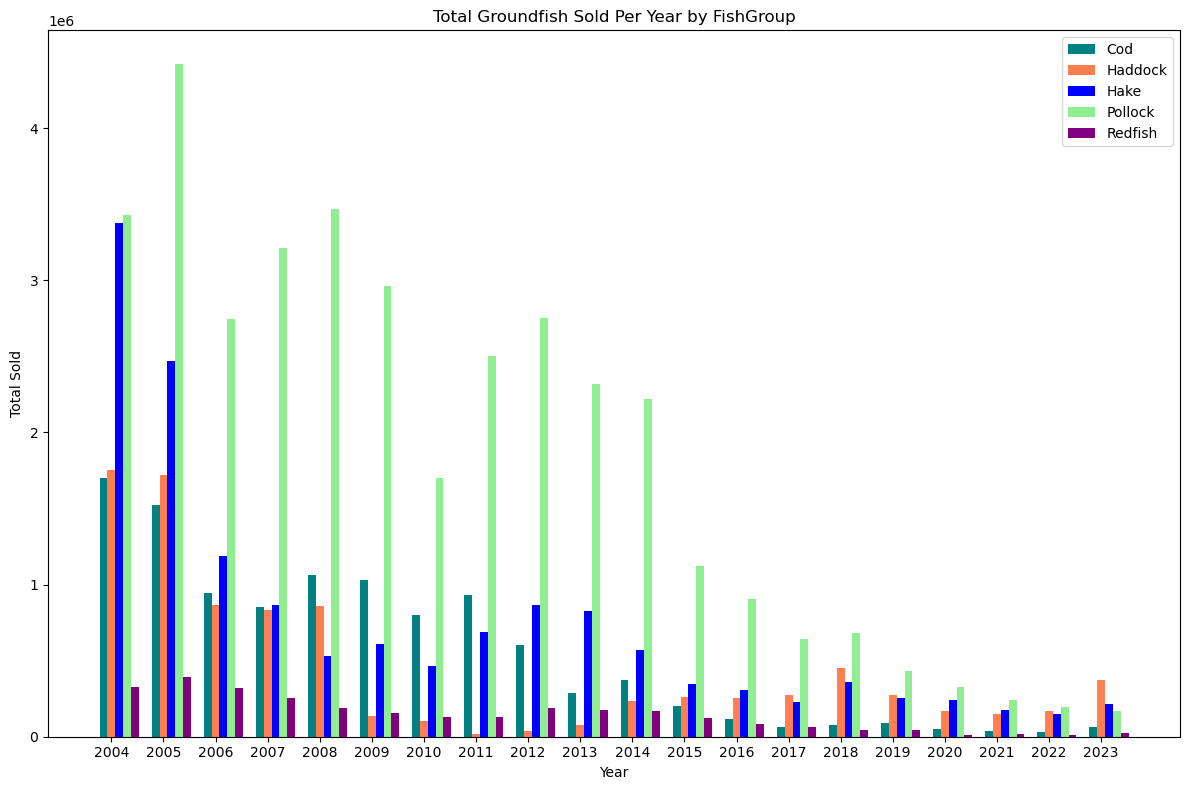

In [20]:
# Define a function to filter the DataFrame by FishGroup and calculate total sold per year
def total_sold_per_year_by_fishgroup(fishgroup):
    groundfish_df_filtered = groundfish_df[groundfish_df['FishGroup'] == fishgroup]
    total_sold_per_year = groundfish_df_filtered.groupby('YearNum')['Sold'].sum().reset_index()
    return total_sold_per_year

# Specified FishGroups
specified_groups = ['Cod', 'Haddock', 'Hake', 'Pollock', 'Redfish']

# Get total sold per year for each specified FishGroup
totals_per_group = {group: total_sold_per_year_by_fishgroup(group) for group in specified_groups}

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
positions = np.arange(len(totals_per_group['Cod']['YearNum']))  # Assuming similar year coverage for simplicity

# Colors for each group for visual distinction
colors = ['teal', 'coral', 'blue', 'lightgreen', 'purple']
for i, (group, color) in enumerate(zip(specified_groups, colors)):
    plt.bar(positions + bar_width * i, totals_per_group[group]['Sold'], width=bar_width, label=group, color=color)

plt.xlabel('Year')
plt.ylabel('Total Sold')
plt.title('Total Groundfish Sold Per Year by FishGroup')
# Assuming the years are consistent across groups, adjust if necessary
plt.xticks(positions + bar_width, totals_per_group['Cod']['YearNum'])
plt.legend()

plt.tight_layout()
plt.show()

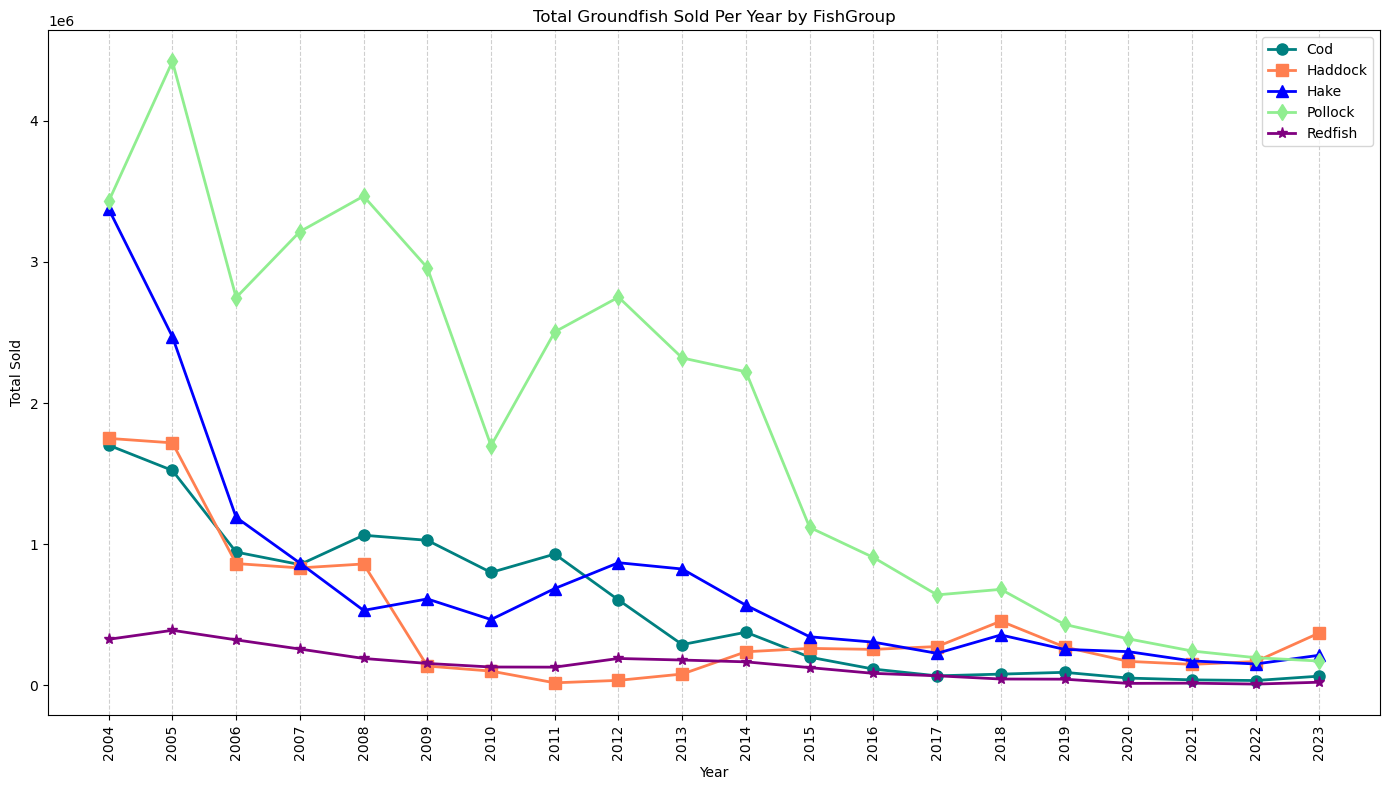

In [21]:
# Plotting
plt.figure(figsize=(14, 8))

# Define the range of years to display on the x-axis
years_range = np.arange(2004, 2024)

# Colors and markers for visual distinction
colors = ['teal', 'coral', 'blue', 'lightgreen', 'purple']
markers = ['o', 's', '^', 'd', '*']

for group, color, marker in zip(specified_groups, colors, markers):
    # Extract year and sold data for the group
    years = totals_per_group[group]['YearNum']
    sold = totals_per_group[group]['Sold']

    # Plotting each group with a line and markers
    plt.plot(years, sold, label=group, color=color, marker=marker, linestyle='-', linewidth=2, markersize=8)


plt.xticks(years_range, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Sold')
plt.title('Total Groundfish Sold Per Year by FishGroup')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.legend()
plt.tight_layout()
plt.show()


In [22]:
print(groundfish_df['FishGroup'].unique())

['Cod' 'Haddock' 'Halibut' 'Hake' 'Pollock' 'Redfish' 'Yellowtail' 'OTHER']


In [23]:
filepath = "../../data/pfex_2004-2024_processed.csv"
groundfish_df.to_csv(filepath, index=False)